<a href="https://colab.research.google.com/github/ichhitsapkota143/Machine-Learning/blob/main/Iris_Flower_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [ ]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn, target_names=target_names))


KNN Classifier Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict(X_test_scaled)

print("\nLinear SVM Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_linear):.4f}")
print(classification_report(y_test, y_pred_svm_linear, target_names=target_names))



Linear SVM Classifier Performance:
Accuracy: 0.9667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Select two features: petal length and petal width
X_vis = X[:, [2, 3]]
y_vis = y

# Split and scale
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)


In [ ]:
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis_scaled, y_train_vis)

svm_vis = SVC(kernel='linear', C=1.0)
svm_vis.fit(X_train_vis_scaled, y_train_vis)


SVC(kernel='linear')

In [ ]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Petal length (scaled)')
    plt.ylabel('Petal width (scaled)')
    plt.title(title)
    plt.grid(True)
    plt.show()


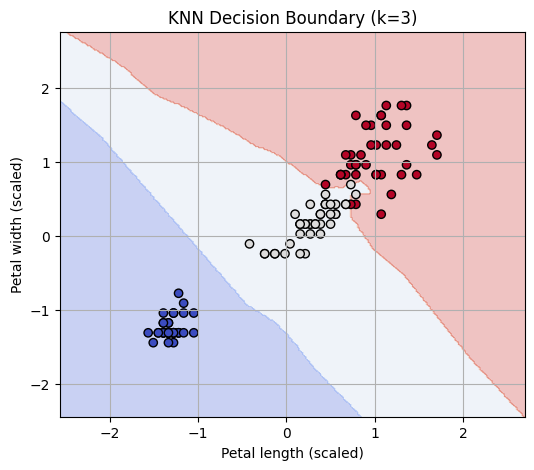

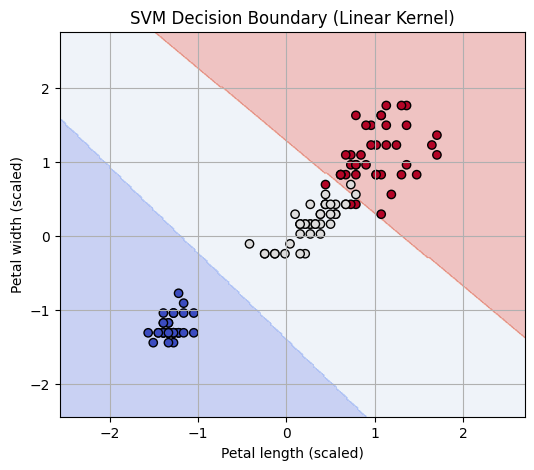

In [ ]:
plot_decision_boundary(knn_vis, X_train_vis_scaled, y_train_vis, "KNN Decision Boundary (k=3)")
plot_decision_boundary(svm_vis, X_train_vis_scaled, y_train_vis, "SVM Decision Boundary (Linear Kernel)")


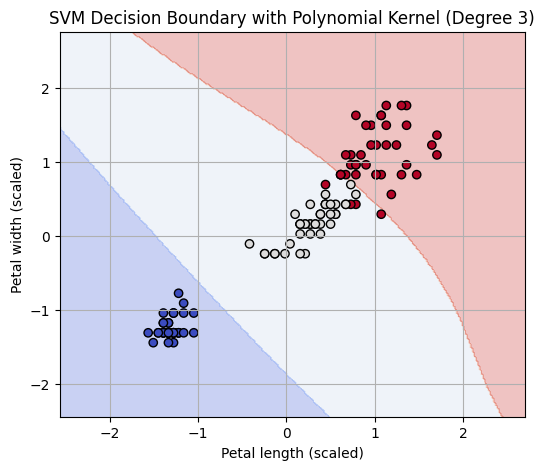

In [ ]:
svm_poly = SVC(kernel='poly', degree=3, gamma='auto', C=1.0)
svm_poly.fit(X_train_vis_scaled, y_train_vis)

plot_decision_boundary(svm_poly, X_train_vis_scaled, y_train_vis, "SVM Decision Boundary with Polynomial Kernel (Degree 3)")


In [ ]:
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1.0)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)

print("\nSVM with RBF Kernel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_rbf):.4f}")
print(classification_report(y_test, y_pred_svm_rbf, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))



SVM with RBF Kernel Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



Random Forest Classifier Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


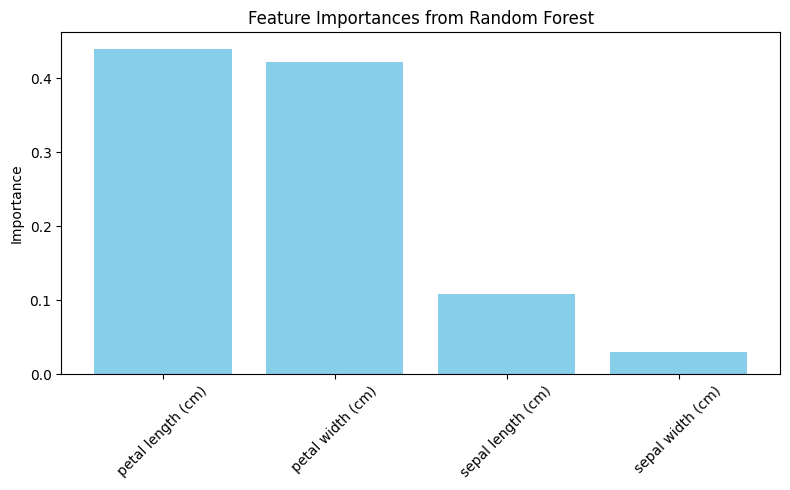

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature importance plot
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


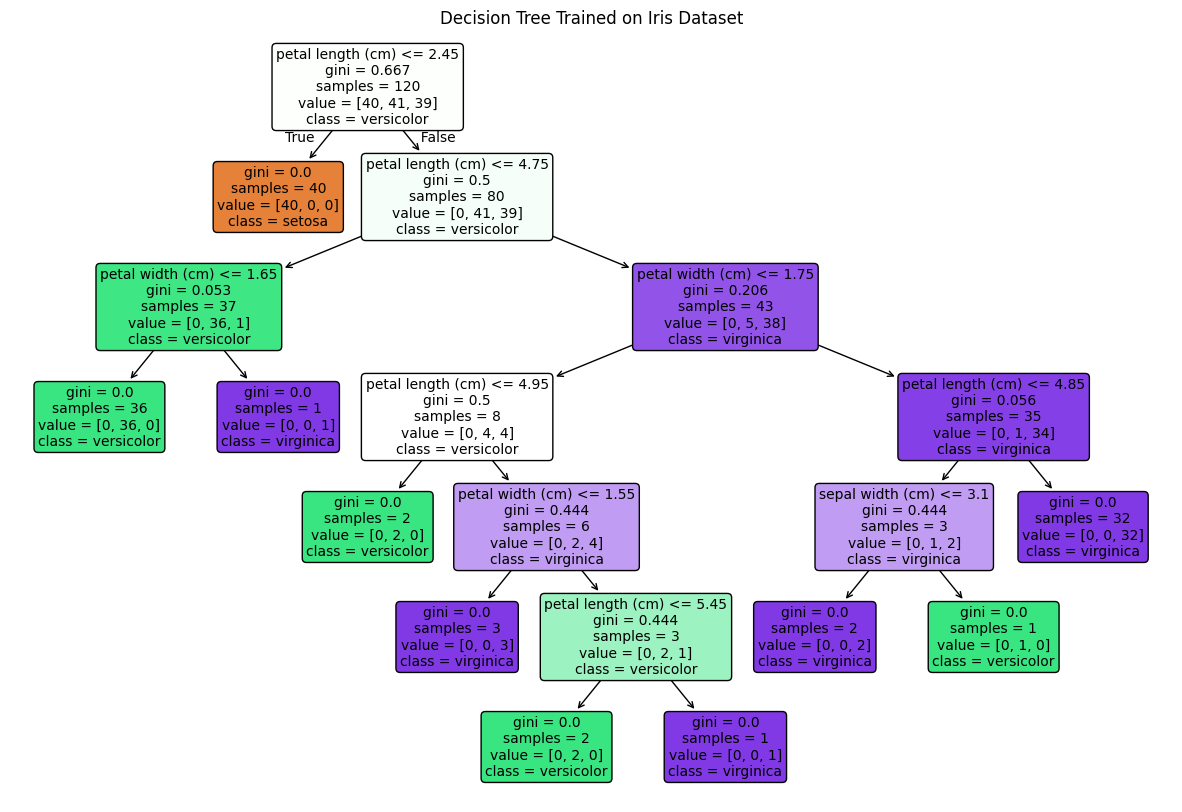

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(dt_clf,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()
